## 1.  Introduction à Python, Numpy et Scipy

# 1

In [ ]:
def nextpower( n ):
    "calcule la première puissance de 2 supérieure ou égale à un nombre n"
    nb = 1;
    while nb < n:
        nb *= 2;
    return nb

In [ ]:
nextpower(4), type(nextpower(4))

# 2

In [ ]:
def generateStringsNoSlicing():
        "générer par une opération de slicing la chaîne de caractère cfilorux et, de deux façons diﬀérentes, la chaîne de caractère vxz"
        alpha = "abcdefghijklmnopqrstuvwxyz"
        out = ""
        for i in range(2,24,3):
                out += alpha[i]
        return (out)        
    

In [ ]:
print(generateStringsNoSlicing())

In [ ]:
def generateStrings():
        "générer par une opération de slicing la chaîne de caractère cfilorux et, de deux façons diﬀérentes, la chaîne de caractère vxz"
        alpha = "abcdefghijklmnopqrstuvwxyz"
        return (alpha[2:24:3], alpha[25:20:-2][::-1], alpha[21:26:2])

In [ ]:
print(generateStrings())

# 3

In [ ]:
from math import pi
print(str(pi)[0:11])

# 4

In [ ]:
input_string = "HelLo WorLd!!!"
frequencies = {} 
for char in input_string: 
   if char in frequencies: 
      frequencies[char] += 1
   else: 
      frequencies[char] = 1

In [ ]:
print(frequencies)

# 5 

In [ ]:
import random
def cesare( clear ):
        "codage par inversion de lettres"
        alpha = "abcdefghijklmnopqrstuvwxyz"
        shuffled = list(alpha)
        random.shuffle(shuffled)
        shuffled = "".join(shuffled)
        dictionary = dict(zip(alpha, shuffled))
        cypher = ""
        for c in clear:
            if c in alpha:
                cypher += dictionary[c]
            else:
                cypher += c
        return (shuffled, cypher)

In [ ]:
%%timeit -n6 -r10
print(cesare("HelLo WorLd!!!"))

# 6

In [ ]:
5*2**2

In [ ]:
def calculateProduct(n):
    ans = 1;
    for k in range(n,0, -1):
        term = 4.0*k**2 / (4.0*k**2 - 1)
        ans *= term
    ans *= 2
    return ans

In [ ]:
#%%timeit -r10 -n100
calculateProduct(500)

In [ ]:
import numpy as np
def calculateProductNoLoop(n):
    k = range(n, 0, -1)
    terms = 4 * np.multiply(k, k)
    terms = np.divide(terms, terms-1)
    return 2 * np.prod(terms)

In [ ]:
calculateProductNoLoop(500)
#np.product([1, 2])

In [ ]:
k = range(1,5)
m = range(2,6)
m * np.array(k)

# 7

In [ ]:
def quicksort(ll):
    """a sorting algorithm with a pivot value"""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll.pop() #pivot = last element of the list ll.
        less = []
        greater = []
        for x in ll:
            if x <= pivot:
                less += [x] #append 'x' to 'less'
            else:
                greater += [x] #append 'x' to 'greater'
            #print(less)
        return quicksort(less) + [pivot] + quicksort(greater) #concatenate quicksort(less), pivot and quicksort(greater)

In [ ]:
quicksort([-2, 3, 5, 1, 3])

# 8

In [ ]:
M = np.random.rand(5, 6)* 2*(np.random.randint(2, size=(5,6)) - 0.5 )
M[:,0:6:2] = M[:,0:6:2] - 2*M[:,1:6:2]
M[M<0]=0
M

# 9

In [ ]:
from scipy import linalg
M = np.random.rand(5, 20)* 2*(np.random.randint(2, size=(5,20)) - 0.5 )
G = np.matmul(M.T, M)
match = np.allclose(G,G.T)
if match:
    print("G is symmetrical")
eig = linalg.eigvals(G)
eig[abs(eig)<0.0001] = 0
eig = eig.real
print("The eigenvalues of G are :",eig)
negative = eig<0
positive = np.all(np.logical_not(negative))
if positive:
    print("All of G's eigenvalues are positive")
if (positive and match):
    print("G is definite positive")
print("Le rang de G est:", len(eig[eig>0]))

## 2. Introduction à Pandas, Matplotlib, etc.

# 0

In [371]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
#testing existence of file:
if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(Location, zipfilename)
#unzip part
zip= zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000, usecols=fields, low_memory = False)#, na_values=na_values) 

# 1

In [ ]:
vals = df["Global_active_power"]
i=0; j=0;
missingIndex = set();cleanIndex=set()
for val in vals:
    if val in na_values:
        i+=1
        missingIndex.add(j)
    else:
        cleanIndex.add(j)    
    j+=1
print("There are", i,"missing numbers out of",len(vals), "entries!")

# 2

In [ ]:
#clean = list()
#for j in range(len(vals)):
#    if j not in missingIndex:
#        clean.append(vals[j])
clean = [vals[i] for i in cleanIndex] 

# 3

In [ ]:
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000, usecols=fields, low_memory = False, na_values=na_values)
df['Datetime'] = pd.to_datetime(df['Date']+" "+df['Time'], dayfirst=True)
df = df.set_index(['Datetime'], drop=True)

# 4

In [ ]:
startDate = pd.to_datetime("2007-01-01 00:00:00")
endDate = pd.to_datetime("2007-04-30 23:59:00")
dates = df[startDate:endDate].index
vals = df[startDate:endDate]['Global_active_power']

prevDay=startDate.date()
sum = 0; count = 1; days = []; power = []
for i in range(len(dates)):
    day = dates[i].date()
    
    val = vals[i]
    if day not in days:
        days = days + [day]
    if day == prevDay:
        sum += val
        count+=1
    else:
        sum /= count
        power = power + [sum]
        count = 1
        sum = val
    prevDay = day
sum /= count
power = power + [sum]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(days,
        power,
        color='purple')
ax.set(xlabel="Date",
       ylabel="Active Power",
       title="Global active power\nbetween January 1st and April 30th\nin 2007")
plt.show()

Cause:

A suicide bomber strikes Bagram Air Base in Afghanistan within earshot of Vice President Dick Cheney, who was rushed to a bomb shelter.
Dow Jones industrial average drops 546 points, the worst drop since the 2001 terrorist attacks.

In [ ]:
df.plot(figsize=(15, 10))

# 5

In [368]:
filename = 'ECAD_2016-09-11'
fields = ['DATE', 'TG']
na_values=[-9999]
df = pd.read_csv(filename + '.txt', usecols=fields, na_values=na_values,  nrows=34885, sep = ',', low_memory = False, comment = '#', skipinitialspace=True)
df = df.dropna()
df['TG'] /= 10

# 6

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format = '%Y%m%d')
df = df.set_index(['DATE'], drop=True)

In [ ]:
startDate = pd.to_datetime("2007-01-01")
endDate = pd.to_datetime("2007-04-30")
datesTemp = df[startDate:endDate].index
valsTemp = df[startDate:endDate]['TG']

#let's plot
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(xlabel="Date",
       ylabel="Active Power",
       title="Global active power and Temperature in Orly\nbetween January 1st and April 30th\nin 2007")
plt.plot(days, power, datesTemp, valsTemp)

# 7

In [504]:
import sys
filename = '20080421_20160927-PA13_auto'
na_values = ['n/d', 'nan']
df = pd.read_csv(filename + '.csv',  sep = ';', na_values=na_values, low_memory = False)#, nrows=34885, usecols=fields, na_values=na_values, comment = '#', skipinitialspace=True)
unit = df['NO2'][0]
df = df[1:]
df = df.dropna()
df['NO2'] = np.int_(df['NO2'], dtype='Int64')
df['O3'] = np.int_(df['O3'], dtype='Int64')
df['heure'] = np.array(np.int_(df['heure']) - 1,dtype=str)
df['datetime'] = pd.to_datetime(df['date']+' '+df['heure']+':00:00', dayfirst=True)
df = df.set_index(['datetime'], drop=True)

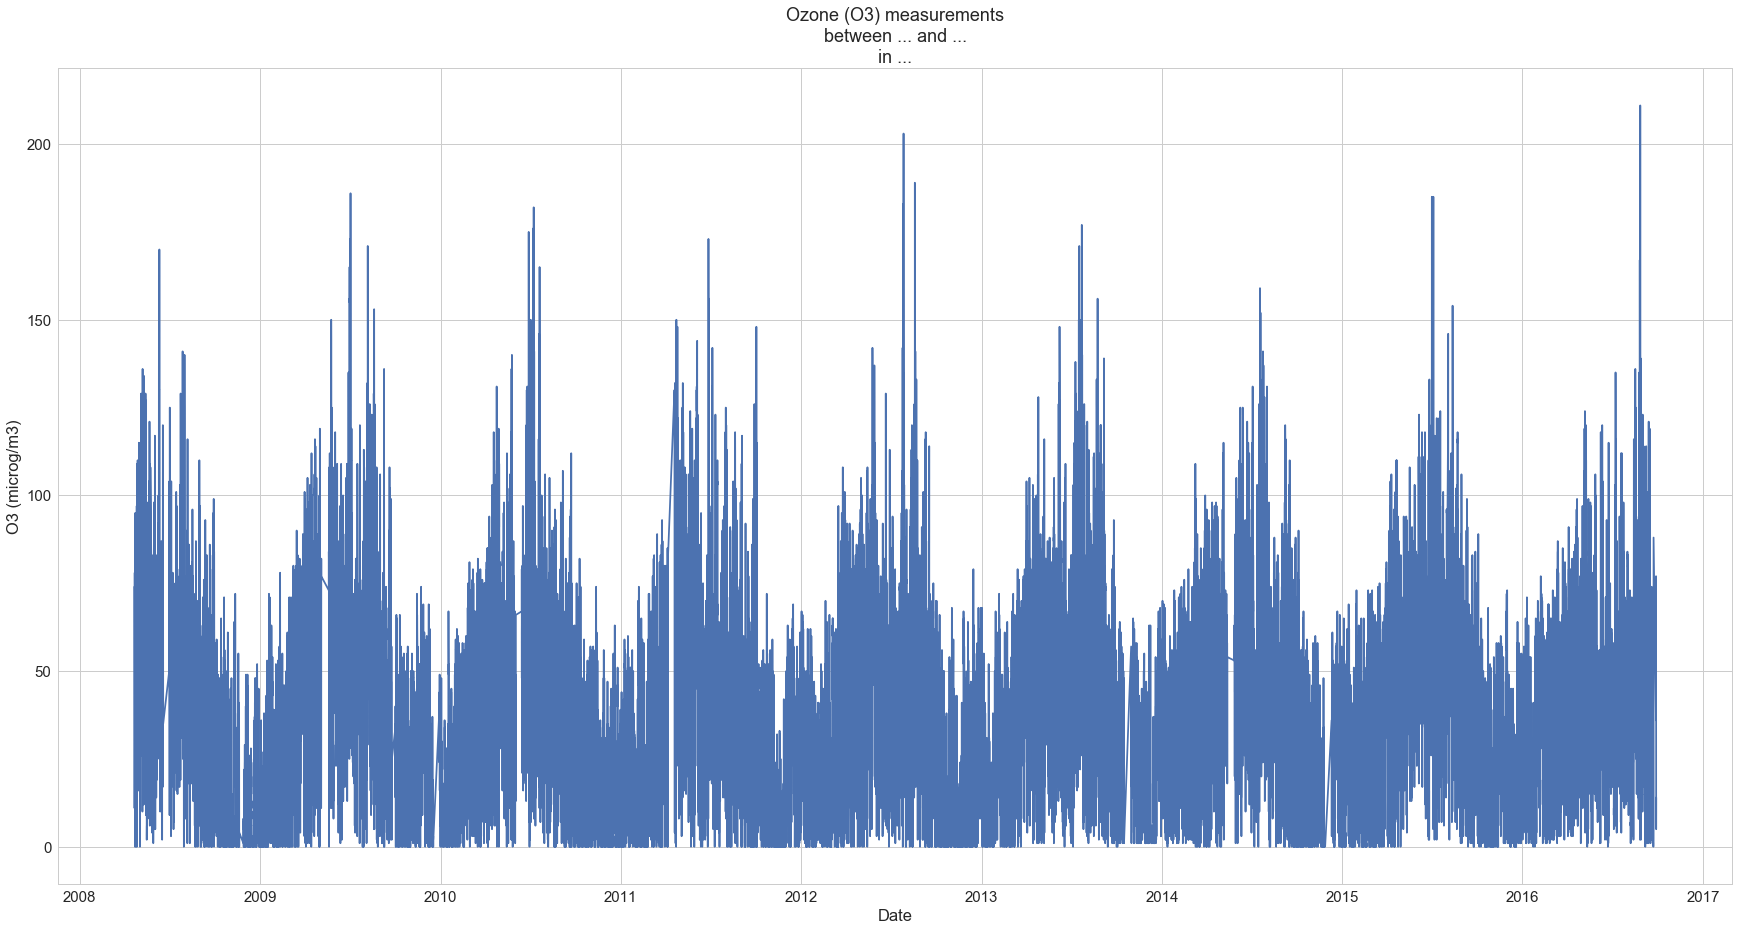

In [482]:
#startDate = pd.to_datetime("2007-01-01 00:00:00")
#endDate = pd.to_datetime("2007-04-30 23:00:00")
#datesOzone = df[startDate:endDate].index
#valsOzone = df[startDate:endDate]['NO2']
datesOzone = df.index[::]
valsOzone = df['O3'][::]

#let's plot
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(xlabel="Date",
       ylabel="O3 ("+unit+")",
       title="Ozone (O3) measurements\nbetween ... and ...\nin ...")
plt.plot(datesOzone, valsOzone)

# 8

In [594]:
datesOzone = df.index
valsOzone = df['O3']

prevMonth=df.index[0]
sum = 0; count = 1; years = []; powerOzoneY = []
for i in range(len(datesOzone)):
    day = datesOzone[i].date()
    time = datesOzone[i].time()
    
    val = valsOzone[i]
    if day.year not in years:
            years = years + [day.year]
    if day.year == prevDay.year:
        sum += val
        count+=1
    else:
        sum /= count
        powerOzoneY = powerOzoneY + [sum]
        count = 1
        sum = val
    prevDay = day
sum /= count
powerOzoneY = powerOzoneY + [sum]
powerOzoneY = powerOzoneY[1:]

In [595]:
datesAzote = df.index
valsAzote = df['NO2']

prevMonth=df.index[0]
sum = 0; count = 1; years = []; powerAzoteY = []
for i in range(len(datesAzote)):
    day = datesAzote[i].date()
    time = datesAzote[i].time()
    
    val = valsAzote[i]
    if day.year not in years:
            years = years + [day.year]
    if day.year == prevDay.year:
        sum += val
        count+=1
    else:
        sum /= count
        powerAzoteY = powerAzoteY + [sum]
        count = 1
        sum = val
    prevDay = day
sum /= count
powerAzoteY = powerAzoteY + [sum]
powerAzoteY = powerAzoteY[1:]

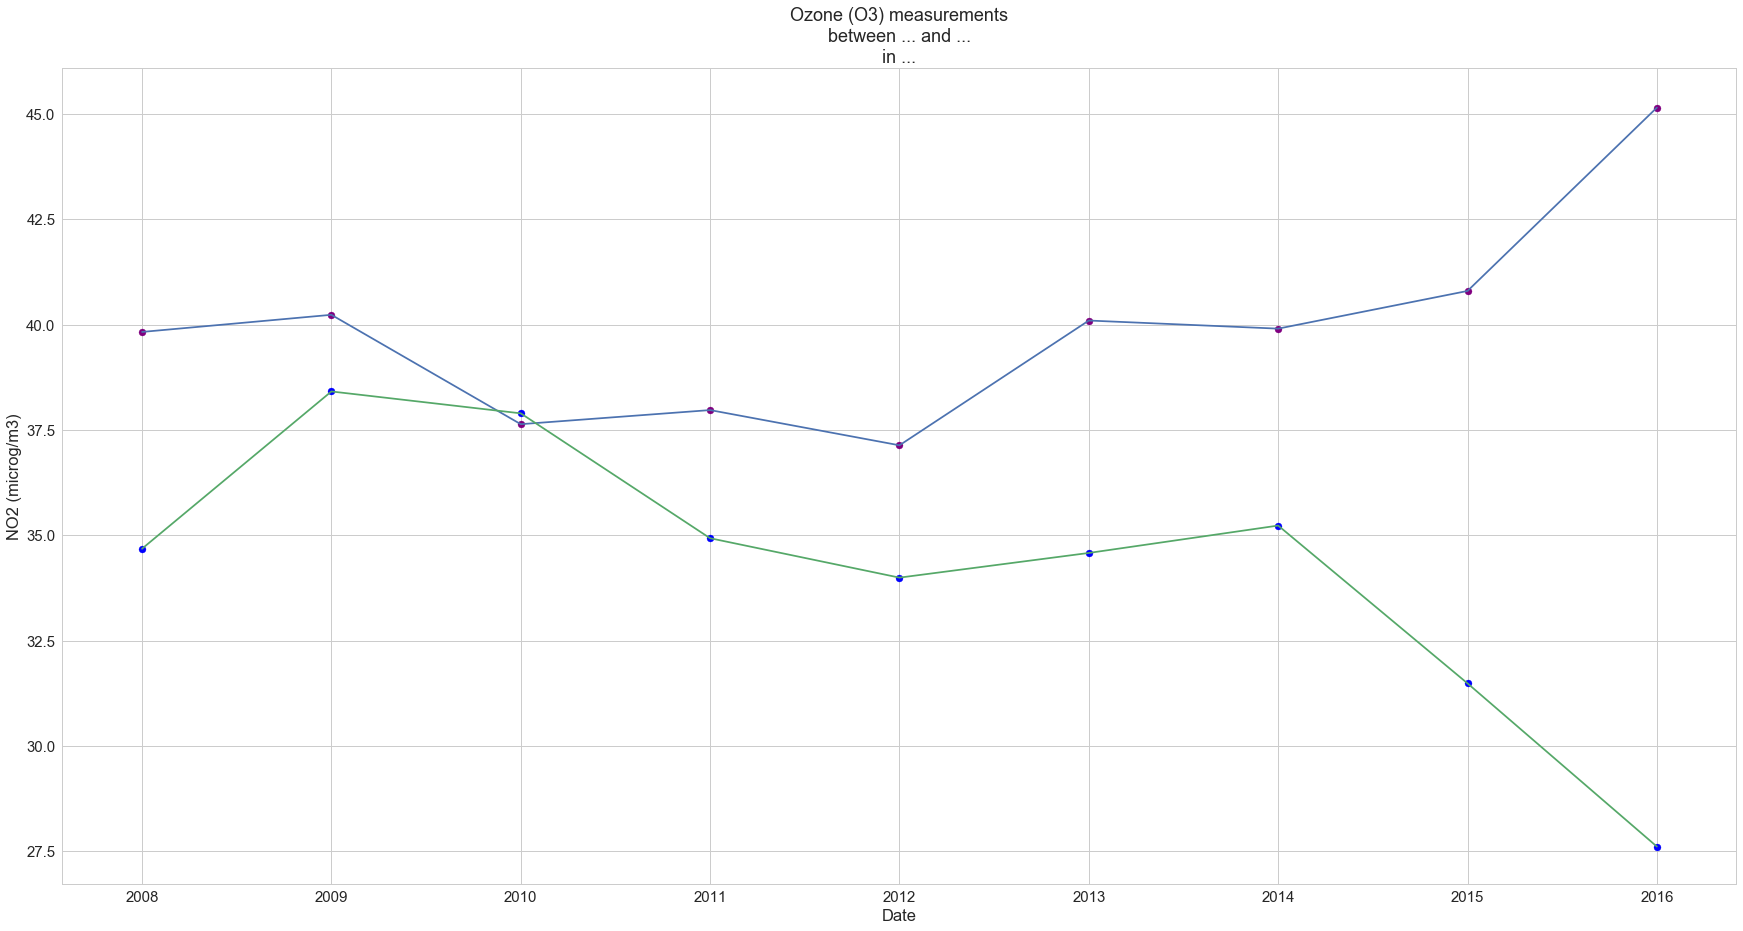

In [598]:
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(xlabel="Date",
       ylabel="NO2 ("+unit+")",
       title="Ozone (O3) measurements\nbetween ... and ...\nin ...")

plt.scatter(years, powerAzoteY, color='blue')
plt.scatter(years, powerOzoneY, color='purple')

plt.plot(years, powerOzoneY,  years, powerAzoteY)
plt.show()

# 9

In [559]:
datesOzone = df.index
valsOzone = df['O3']

prevMonth=df.index[0]
sum = 0; count = 1; monthes = []; powerOzoneM = []
for i in range(len(datesOzone)):
    day = datesOzone[i].date()
    time = datesOzone[i].time()
    val = valsOzone[i]
    if day.day == 1 and time.hour == 0 and time.minute == 0 and time.second == 0:
        if day not in monthes:
            monthes = monthes + [day]
    if day.month == prevDay.month:
        sum += val
        count+=1
    else:
        sum /= count
        powerOzoneM = powerOzoneM + [sum]
        count = 1
        sum = val
    prevDay = day
sum /= count
powerOzoneM = powerOzoneM + [sum]
powerOzoneM = powerOzoneM[5:]

In [561]:
datesAzote = df.index
valsAzote = df['NO2']

prevMonth=df.index[0]
sum = 0; count = 1; monthes = []; powerAzoteM = []
for i in range(len(datesAzote)):
    day = datesAzote[i].date()
    time = datesAzote[i].time()
    val = valsAzote[i]
    if day.day == 1 and time.hour == 0 and time.minute == 0 and time.second == 0:
        if day not in monthes:
            monthes = monthes + [day]
    if day.month == prevDay.month:
        sum += val
        count+=1
    else:
        sum /= count
        powerAzoteM = powerAzoteM + [sum]
        count = 1
        sum = val
    prevDay = day
sum /= count
powerAzoteM = powerAzoteM + [sum]
powerAzoteM = powerAzoteM[5:]

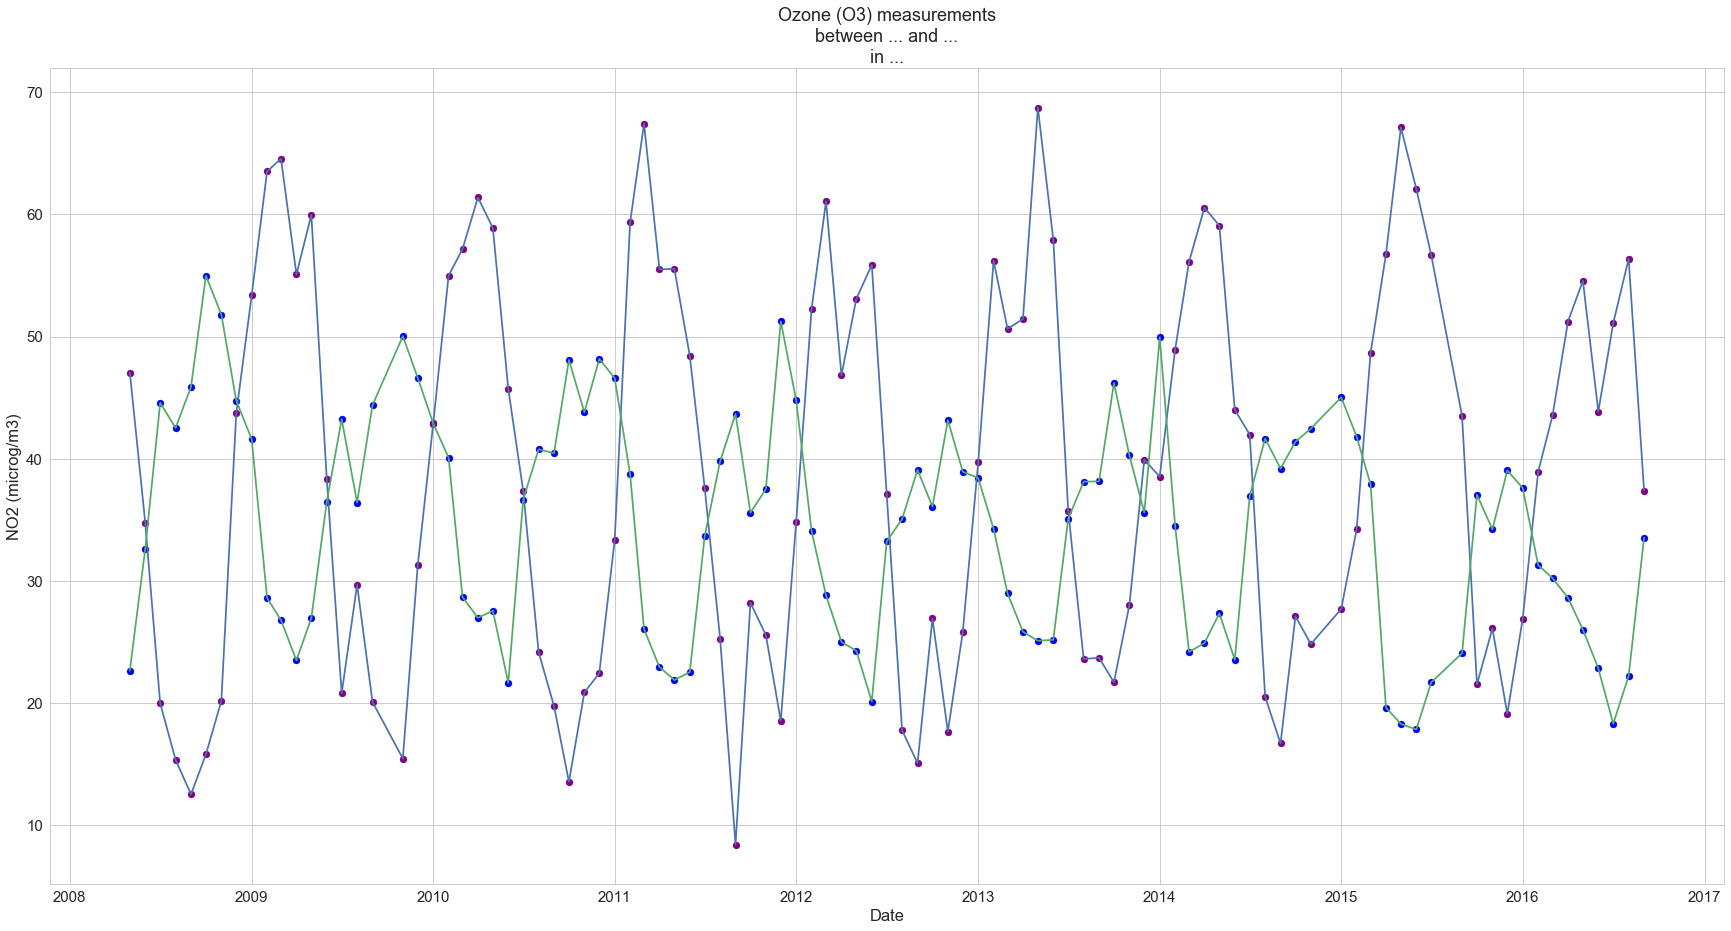

In [567]:
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(xlabel="Date",
       ylabel="NO2 ("+unit+")",
       title="Ozone (O3) measurements\nbetween ... and ...\nin ...")

plt.scatter(monthes, powerAzoteM, color='blue')
plt.scatter(monthes, powerOzoneM, color='purple')

plt.plot(monthes, powerOzoneM,  monthes, powerAzoteM)
plt.show()